# Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

**1.1**. Скачать данные (недвижимость)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**1.2** Изучите стоимости недвижимости


In [4]:
df['price'].value_counts().reset_index()


,index,price
0,"350,000.00",172
1,"450,000.00",172
2,"550,000.00",159
3,"500,000.00",152
4,"425,000.00",150
...,...,...
4023,"607,010.00",1
4024,"1,362,500.00",1
4025,"298,800.00",1
4026,"957,500.00",1


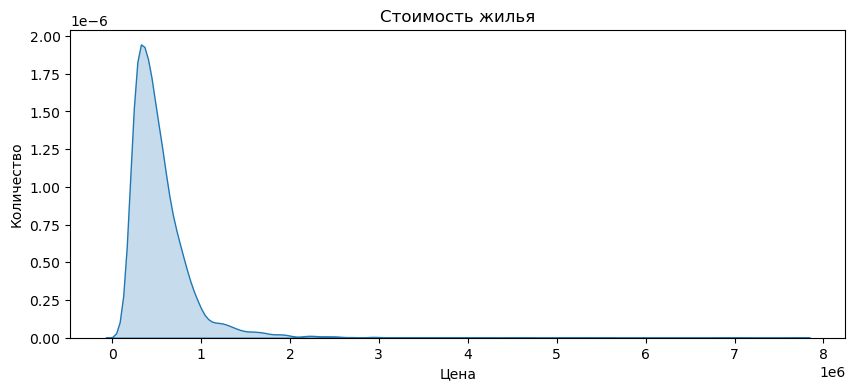

In [5]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df['price'], fill=True)

plt.title('Стоимость жилья')
plt.xlabel('Цена')
plt.ylabel('Количество');

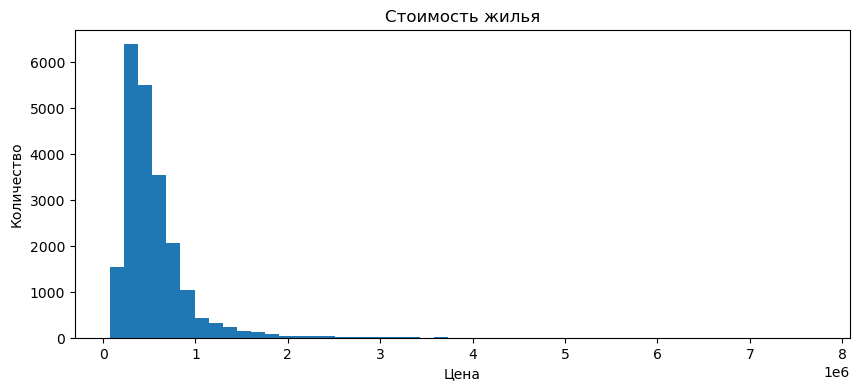

In [6]:
plt.figure(figsize=(10, 4))

plt.hist(df['price'], bins = 50) 

plt.title('Стоимость жилья')
plt.xlabel('Цена')
plt.ylabel('Количество');

Вывод: стоимость большей части домов до 1 млн

**1.3** Изучите распределение квадратуры жилой


In [7]:
df['sqft_living'].value_counts().reset_index()

,index,sqft_living
0,1300,138
1,1400,135
2,1440,133
3,1800,129
4,1660,129
...,...,...
1033,9890,1
1034,5584,1
1035,1961,1
1036,5720,1


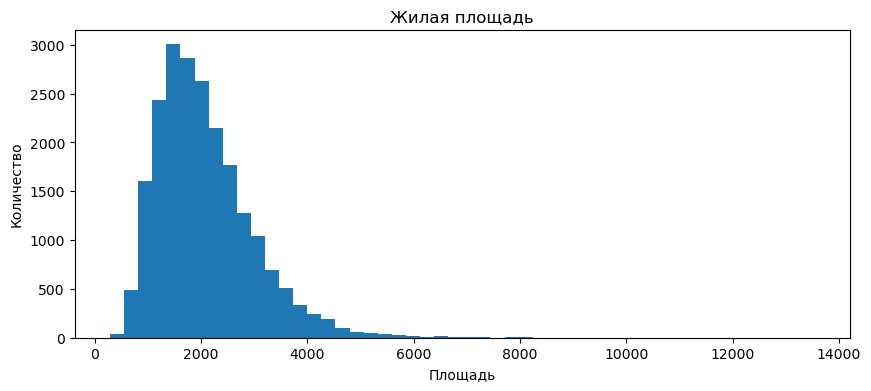

In [8]:
plt.figure(figsize=(10, 4))

plt.hist(df['sqft_living'], bins = 50) 

plt.title('Жилая площадь')
plt.xlabel('Площадь')
plt.ylabel('Количество');

Вывод: большая часть домов имеет жилую площадь от 1000 до 2500 

**1.4** Изучите распределение года постройки



In [9]:
data = df['yr_built'].value_counts().reset_index()
data.head()

,index,yr_built
0,2014,559
1,2006,454
2,2005,450
3,2004,433
4,2003,422


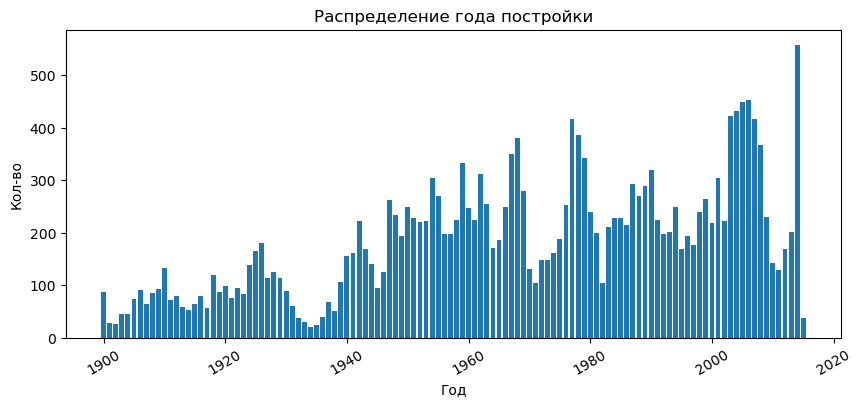

In [10]:
plt.figure(figsize=(10, 4))

plt.bar(data['index'], data['yr_built'])

plt.title('Распределение года постройки')
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

Наиболее активно строительство происходило с 2000 года

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы


In [11]:
data = pd.crosstab(df['view'], df['waterfront'], normalize='index').reset_index()
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

waterfront,view,no,yes
0,0,1.00,0.00
1,1,1.00,0.00
2,2,0.99,0.01
3,3,0.96,0.04
4,4,0.58,0.42


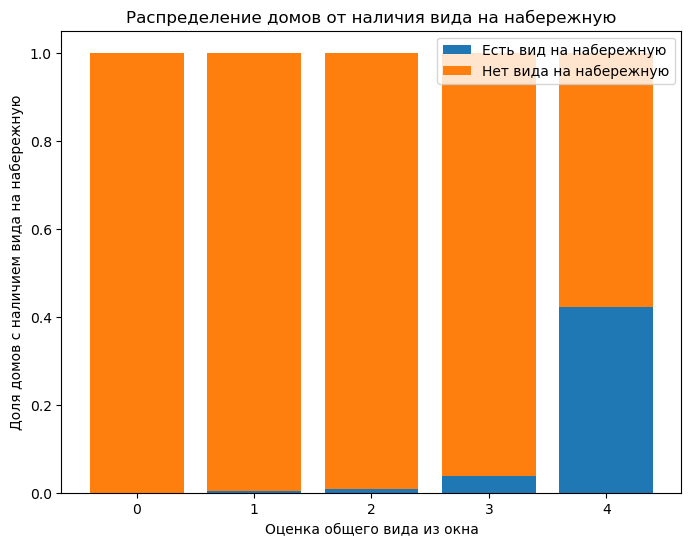

In [12]:
plt.figure(figsize=(8, 6))

plt.bar(data['view'], data['no'])
plt.bar(data['view'], data['no'], bottom=data['yes'])

plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Оценка общего вида из окна')
plt.ylabel('Доля домов с наличием вида на набережную')
plt.legend(['Есть вид на набережную', 'Нет вида на набережную']);
# plt.xticks(rotation = 0);

Наличие вида на набережную повышает общую оценку вида из окон

### 2.2 Изучите распределение этажей домов


In [25]:
data = df['floors'].value_counts().reset_index()
data

,index,floors
0,1.00,10680
1,2.00,8241
2,1.50,1910
3,3.00,613
4,2.50,161
5,3.50,8


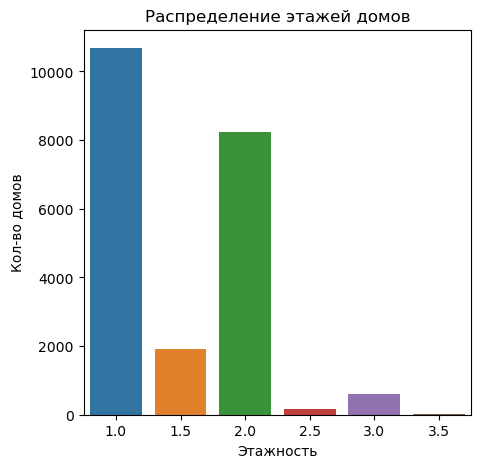

In [26]:
plt.figure(figsize=(5, 5))

sns.barplot(x=data['index'], y=data['floors'])

plt.title('Распределение этажей домов')
plt.xlabel('Этажность')
plt.ylabel('Кол-во домов');
# plt.xticks(rotation=70);

Больше всего одно- и двухэтажных домов

### 2.3 Изучите распределение состояния домов



In [15]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

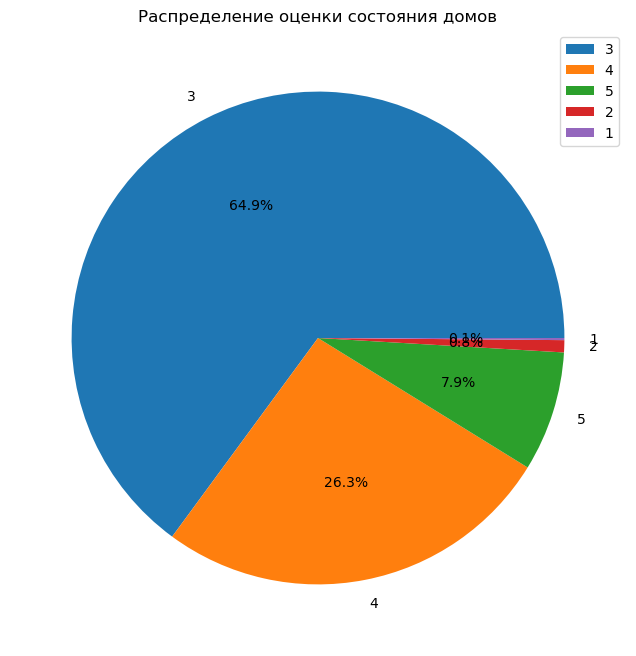

In [16]:
plt.figure(figsize=(10, 8))

plt.pie(data.values, autopct='%1.1f%%', labels = data.index)

plt.title('Распределение оценки состояния домов')
plt.legend(data.index);

Большая часть домов имеет среднюю оценку состояния (3)

In [17]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [18]:
data = pd.crosstab(df['condition'], df['renovated'], normalize='index').reset_index()
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

renovated,condition,no,yes
0,1,0.97,0.03
1,2,0.98,0.02
2,3,0.95,0.05
3,4,0.98,0.02
4,5,0.98,0.02


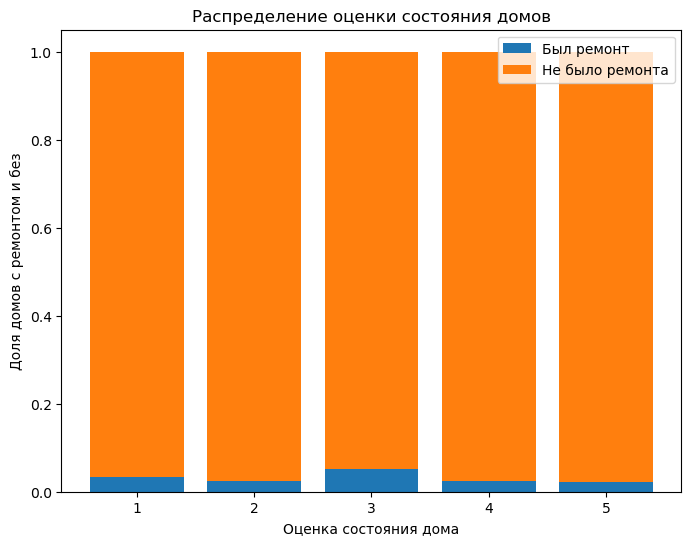

In [19]:
plt.figure(figsize=(8, 6))

plt.bar(data['condition'], data['no'])
plt.bar(data['condition'], data['no'], bottom=data['yes'])

plt.title('Распределение оценки состояния домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Доля домов с ремонтом и без')
plt.legend(['Был ремонт', 'Не было ремонта']);

В подавляющем большинстве домов капитального ремонта не было. Доля домов с ремонтом, оцененных на 3 балла, незначительно больше, чем в домах с другими оценками.

## 3 задача
- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 1
Проведем анализ стоимости домов относительно количества спален

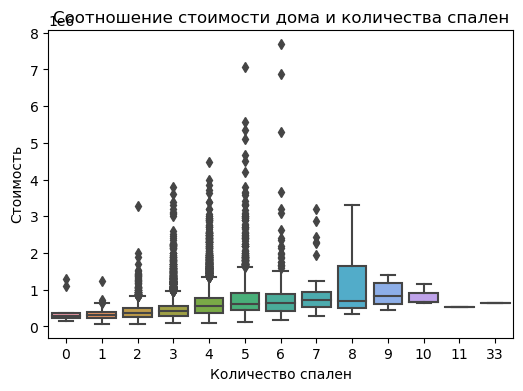

In [27]:
plt.figure(figsize=(6, 4))

sns.boxplot(y='price', x='bedrooms', data=df);

plt.title('Соотношение стоимости дома и количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Стоимость');

Из графика наблюдаем наличие выбросов price и bedrooms (11 или 33 спальни). Так же видим, что большая часть домов по стоимости лежит в диапазоне 0-1млн.

### 2
Проведем анализ стоимости жилья относительно количества ванных комнат

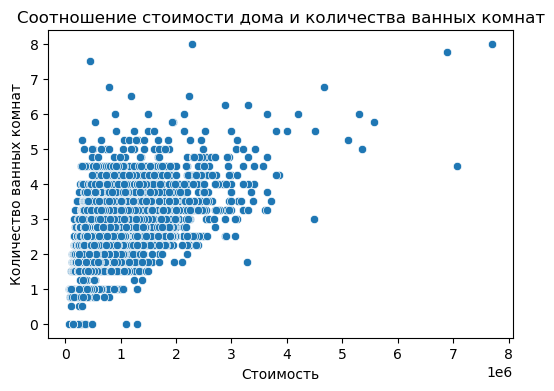

In [32]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=df['price'], y=df['bathrooms'])

plt.title('Соотношение стоимости дома и количества ванных комнат')
plt.xlabel('Стоимость')
plt.ylabel('Количество ванных комнат');

Четкой линейной зависимости не наблюдается.

### 3
Проведем анализ стоимости домов относительно жилой площади

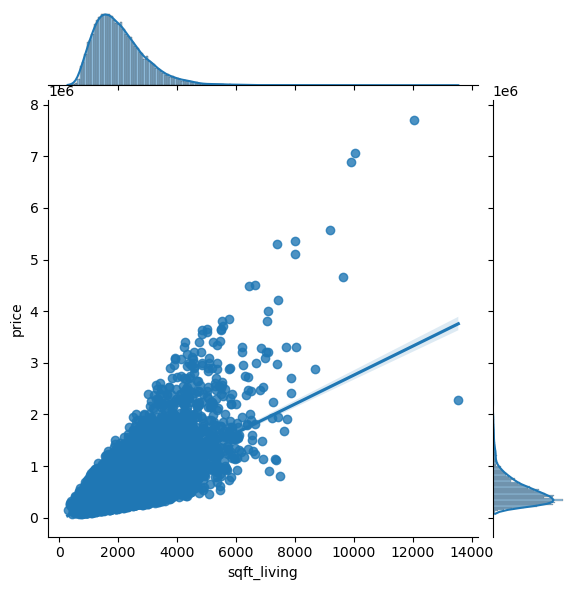

In [22]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg'); 

Существует прямая линейная зависимость между стоимостью жилья и жилой площадью дома

### 4
Проследим связь между средней стоимостью дома и оценкой его состояния по шкале от 1 до 5

In [50]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('condition').agg({'price':'mean'}).reset_index()
data

,condition,price
0,1,"334,431.67"
1,2,"327,287.15"
2,3,"542,012.58"
3,4,"521,200.39"
4,5,"612,418.09"


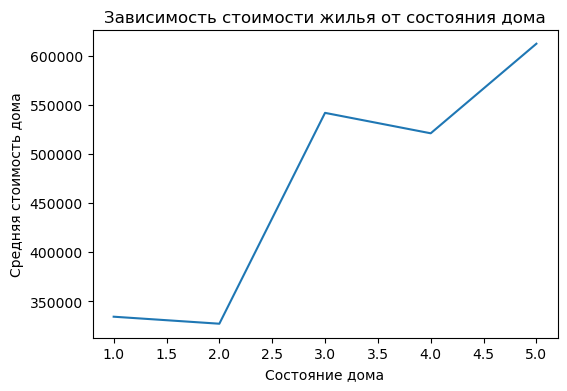

In [52]:
plt.figure(figsize=(6, 4))

plt.plot(data['condition'], data['price'])

plt.title('Зависимость стоимости жилья от состояния дома')
plt.xlabel('Состояние дома')
plt.ylabel('Средняя стоимость дома');

График показывает - чем выше оценка состояния дома, тем выше средняя стоимость

### 5
Произведем оценку стоимости жилья относительно вида на набережную

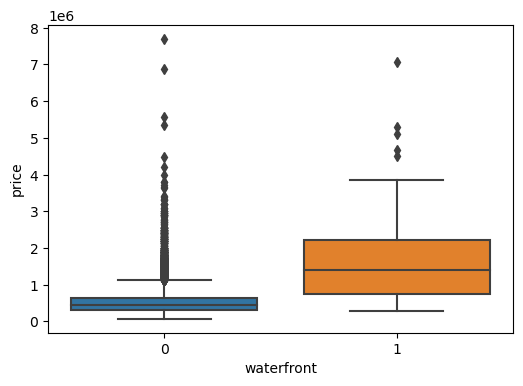

In [73]:
plt.figure(figsize=(6, 4))

sns.boxplot(y='price', x='waterfront', data=df);

Вид на набережную существенно увеличивает стоимость жилья